# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json
import re
import csv
import scipy.stats as scp_stats
import scikit_posthocs as sp

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif',size ='16')
pd.options.display.max_rows = 4000
#matplotlib.rcParams['ps.useafm'] = True
#matplotlib.rcParams['text.usetex'] = True

# Functions

In [45]:
#mainFolder: main folder containing experiment folders
#folder: the folder header
#rep: number of repetitions
def minGenerationCount(mainFolder,folder,rep):
    minimum = 100000
    genCount= []
    for i in range(0,rep):
        csv_file = open('./'+mainFolder+'/'+folder+'xL/'+str(i+1)+'/log/evolution.txt')
        csv_reader = csv.reader(csv_file,delimiter='-')
        #line_count = 0
        #for row in csv_reader:
        #    line_count = line_count + 1
        rows = list(csv_reader)
        line_count = len(rows)
        genCount.append(line_count)
        #print(line_count)
    for count in genCount:
        if (count<=minimum):
            minimum = count
    #print(minimum)
    return minimum

#mainFolder: main folder containing experiment folders
#folder: array of folder headers
#tp: the type of graph 'evol','nModules','brokenConn'
#rep: number of repetitions
#indiv: boolean plot individual graphs or all in the same
def plotResultGraphs(mainFolder,folders,tp,rep,indiv):
    logCol = 1
    file ='evolution'
    if(tp=='evol'):
        logCol = 1
        file = 'evolution'
    elif (tp=='nModules'):
        logCol = 2
        file = 'bestFeatures'
    elif (tp=='brokenConn'):
        logCol = 8
        file = 'meanFeatures'
    
    if(not indiv):
        fig = plt.figure(figsize=(15,10))
        ax1 = fig.gca()
        
    for k in range(0,len(folders)):
        if(indiv):
            fig = plt.figure()
            ax1 = fig.gca()
        nGenerations = minGenerationCount(mainFolder,folders[k],rep)
        df = pd.DataFrame(columns=range(0,nGenerations))
        
        evolBest = []
        
        for i in range(0,rep):
            evolBest.clear()
            csv_file = open('./'+mainFolder+'/'+folders[k]+'xL/'+str(i+1)+'/log/'+file+'.txt')
            #csv_file = open('./filesFromLenghtExperiment/'+folders[k]+'xL/'+str(i+1)+'/log/bestFeatures.txt')
            #csv_file = open('/content/drive/My Drive/2019/Papers/Base Length/filesFromLenghtExperiment/'+folders[k]+'xL/'+str(i+1)+'/log/evolution.txt')
            csv_reader = csv.reader(csv_file,delimiter='-')
            line_count = 0
            for row in csv_reader:
                evolBest.append(float(row[logCol]))
                #evolBest.append(float(row[2]))
                line_count =line_count + 1
                #print(line_count)
                #print(evolBest)
                if line_count >= nGenerations:
                    break
            df.loc[i] = evolBest[:]

        #ax1.plot(df.min(),label='Best')
        #ax1.plot(df.max(),label='Worst')
        x = range(nGenerations)
        q3 = df.quantile(0.75)
        q1 = df.quantile(0.25)

        ax1.plot(x,df.median(),label='Median'+folders[k])
        if(indiv):
            ax1.plot(x,q3, color='k', linestyle='--',label='IQR')
        else:
            ax1.plot(x,q3, color='k', linestyle='--',label='_nolegend_')
        ax1.plot(x,q1, color='k', linestyle='--',label='_nolegend_')
        ax1.fill_between(x, q1, q3, alpha=0.5)
        
        #plt.axhline(y=0.3, color='k', linestyle='-.')
        if(tp=='evol'):
            ax1.set_ylim(-0.1,6)
        elif(tp=='nModules'):
            ax1.set_ylim(-0.1,20)
        elif(tp=='brokenConn'):
            ax1.set_ylim(-0.1,4)
        ax1.legend()
        ax1.set_title('Length x'+folders[k])
        #ax1.set_xticks([0,100,200,300])
        #ax1.set_xticklabels(['0','3000','6000','9000'])
        ax1.set_xlabel('Generations')
        ax1.set_ylabel('Fitness')
        #plt.savefig('CPGGenDEOne.eps',bbox_inches="tight")
    plt.show()
    
    
#mainFolder: main folder containing experiment folders
#folder: array of folder headers
#tp: the type of graph 'evol','nModules','brokenConn'
#rep: number of repetitions
#indiv: boolean plot individual graphs or all in the same    
def boxplotResults(mainFolder,folders,tp,rep,indiv):
    logCol = 1
    file ='evolution'
    if(tp=='evol'):
        logCol = 1
        file = 'evolution'
    elif (tp=='nModules'):
        logCol = 2
        file = 'bestFeatures'
    elif (tp=='brokenConn'):
        logCol = 8
        file = 'meanFeatures'
        
    #dfAll = pd.DataFrame(columns=folders)
    dfAll = pd.DataFrame()
    
    if(not indiv):
        fig = plt.figure(figsize=(15,10))
        ax1 = fig.gca()
        
    
    data = []
        
    for k in range(0,len(folders)):
        if(indiv):
            fig = plt.figure()
            ax1 = fig.gca()
        nGenerations = minGenerationCount(mainFolder,folders[k],rep)
        data.clear()
        
        for i in range(0,rep):
            csv_file = open('./'+mainFolder+'/'+folders[k]+'xL/'+str(i+1)+'/log/'+file+'.txt')
            csv_reader = csv.reader(csv_file,delimiter='-')
            rows = list(csv_reader)
            #print(rows)
            #print(nGenerations)
            data.append(float(rows[nGenerations-1][logCol]))
            
            #line_count = 0
            #for row in csv_reader:
            #    evolBest.append(float(row[logCol]))
                #evolBest.append(float(row[2]))
            #    line_count =line_count + 1
                #print(line_count)
                #print(evolBest)
            #   if line_count >= nGenerations:
            #        break
            #   evolBest[:]
        dfPartial = pd.DataFrame(data,columns=['Fitness'])
        dfPartial['Length'] = folders[k]
        #print(dfPartial)
        
        dfAll= dfAll.append(dfPartial,ignore_index=True)
        #ax1.set_title('Length x'+folders[k])
    #print(dfAll)
    dfAll.boxplot(column='Fitness',by='Length',ax=ax1,grid=False,notch=False)
    #dfAll.groupby('Length',sort=True).boxplot()
    if(tp=='evol'):
            ax1.set_ylim(-0.1,11)
    
    plt.show()
    print(scp_stats.kruskal(*[group['Fitness'].values for name,group in dfAll.groupby('Length')]))
    
    #Connover
    #postHoc = sp.posthoc_conover(dfAll,val_col='Fitness',group_col='Length')
    #print(postHoc)
    
    #Mann-Whitney
    postHoc = sp.posthoc_mannwhitney(dfAll,val_col='Fitness',group_col='Length')
    #print(postHoc)
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sp.sign_plot(postHoc, **heatmap_args)
    
#mainFolder: array of main folder containing experiment folders
#folder: array of folder headers
#tp: the type of graph 'evol','nModules','brokenConn'
#rep: number of repetitions  
def compareBases(mainFolders,folders,tp,rep):
    logCol = 1
    file ='evolution'
    if(tp=='evol'):
        logCol = 1
        file = 'evolution'
    elif (tp=='nModules'):
        logCol = 2
        file = 'bestFeatures'
    elif (tp=='brokenConn'):
        logCol = 8
        file = 'meanFeatures'
        
    dfAll = pd.DataFrame()
    data = []
    
    for l in range(0,len(mainFolders)):
        dfBase = pd.DataFrame()
        for k in range(0,len(folders)):
            nGenerations = minGenerationCount(mainFolders[l],folders[k],rep)
            data.clear()
        
            for i in range(0,rep):
                csv_file = open('./'+mainFolders[l]+'/'+folders[k]+'xL/'+str(i+1)+'/log/'+file+'.txt')
                csv_reader = csv.reader(csv_file,delimiter='-')
                rows = list(csv_reader)
                #print(rows)
                #print(nGenerations)
                data.append(float(rows[nGenerations-1][logCol]))

            dfPartial = pd.DataFrame(data,columns=['Fitness'])
            dfPartial['Length'] = folders[k]
            #print(dfPartial)
        
            dfBase= dfBase.append(dfPartial,ignore_index=True)
            #ax1.set_title('Length x'+folders[k])
        dfBase['Base']=mainFolders[l]
        dfAll = dfAll.append(dfBase,ignore_index=True)
        #print(dfAll)
        #dfAll.boxplot(column='Fitness',by='Length',ax=ax1,grid=False,notch=False)
        #dfAll.groupby('Length',sort=True).boxplot()
    #print(dfAll)
    #print([group['Fitness'].values for name,group in dfAll.groupby(['Length','Base'])])
    print(scp_stats.kruskal(*[group['Fitness'].values for name,group in dfAll.groupby(['Length','Base'])]))

    #Connover
    postHoc = sp.posthoc_conover([group['Fitness'].values for name,group in dfAll.groupby(['Length','Base'])])
    #print(postHoc)
    
    #Mann-Whitney    
    #postHoc = sp.posthoc_mannwhitney([group['Fitness'].values for name,group in dfAll.groupby(['Length','Base'])])
    #print(postHoc)
    
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sp.sign_plot(postHoc, **heatmap_args)

# All Evolution Individual graphs

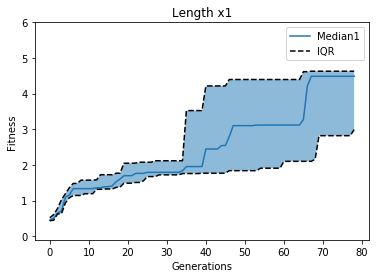

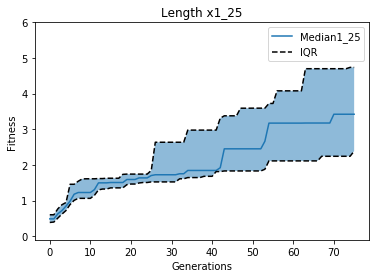

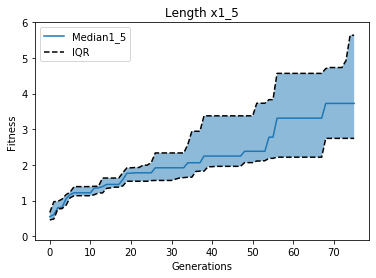

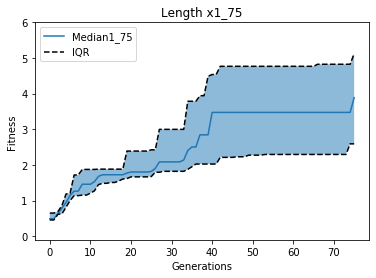

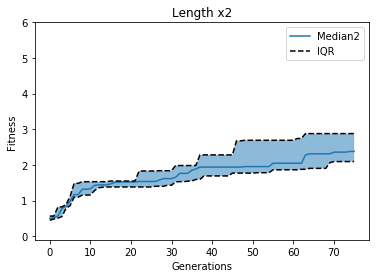

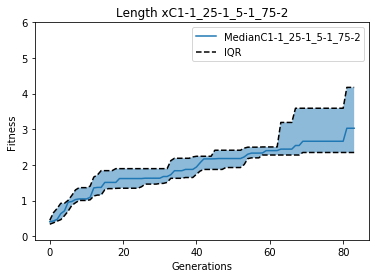

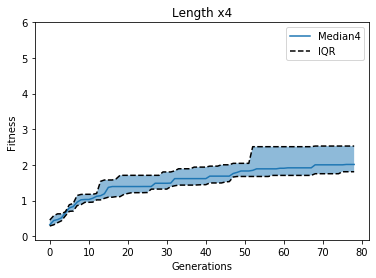

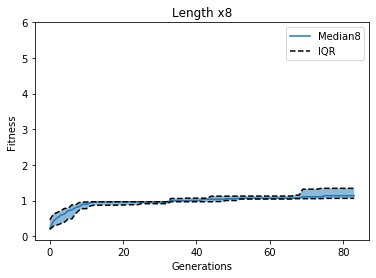

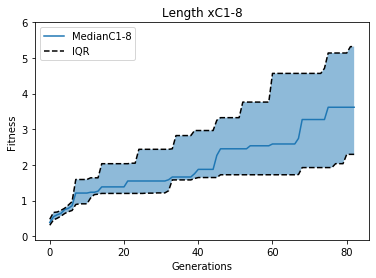

In [3]:
folders = ['1','1_25','1_5','1_75','2','C1-1_25-1_5-1_75-2','4','8','C1-8']     
plotResultGraphs('filesFromLenghtExperiment',folders,'evol',10,True)

# Compare evolutions (Put folders to compare in folders array)

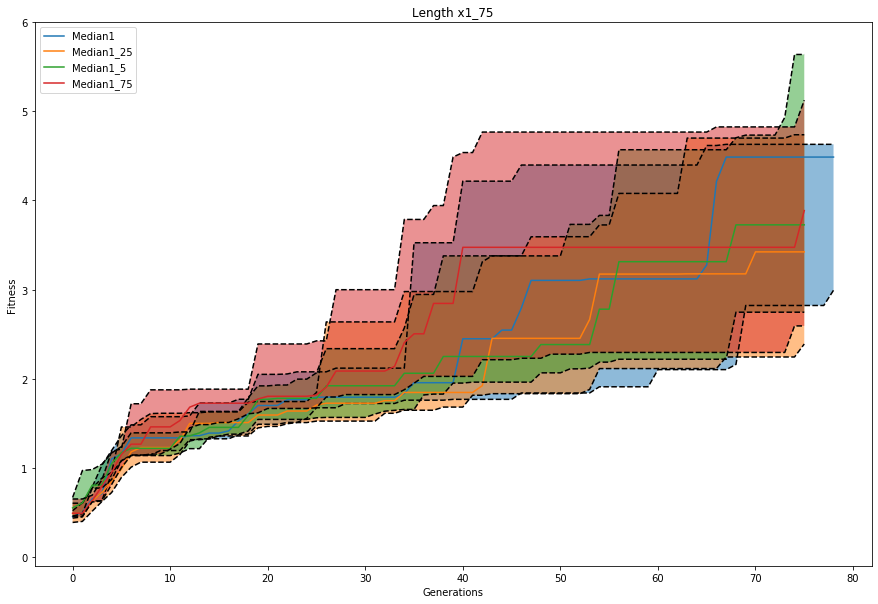

In [4]:
folders = ['1','1_25','1_5','1_75']   #,'2','1-1_25-1_5-1_75-2'
plotResultGraphs('filesFromLenghtExperiment',folders,'evol',10,False)

# Last Gen BoxPlot

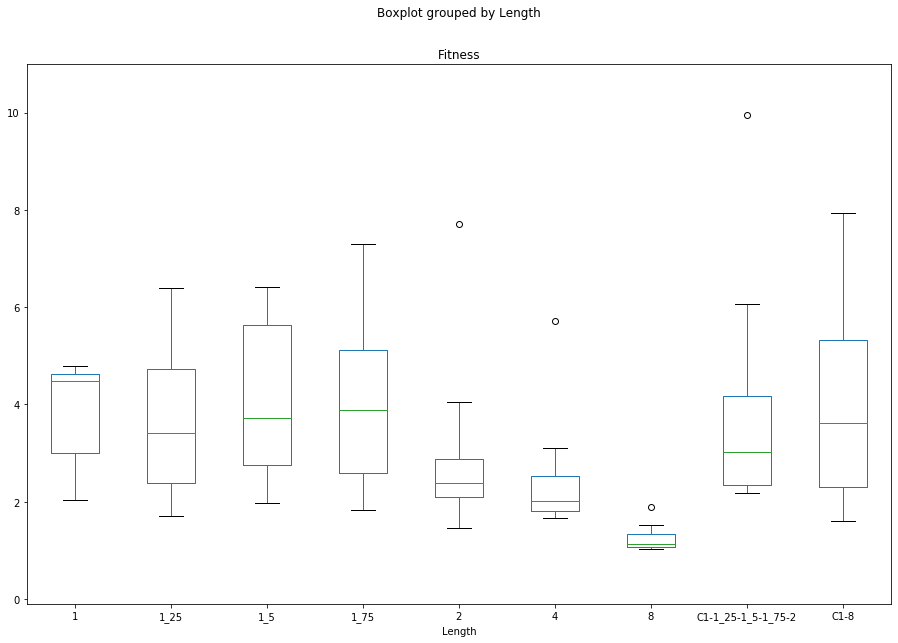

KruskalResult(statistic=34.86945054945056, pvalue=2.8242828605887343e-05)


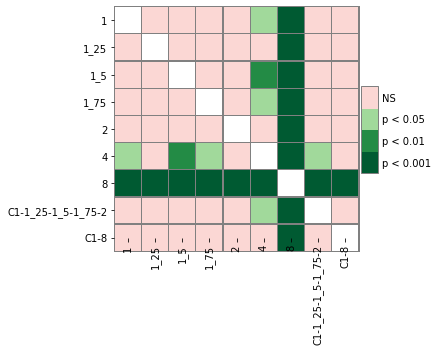

In [46]:
folders = ['1','1_25','1_5','1_75','2','4','8','C1-1_25-1_5-1_75-2','C1-8']
boxplotResults('filesFromLenghtExperiment',folders,'evol',10,False)

# Last Gen BoxPlot FlatBase

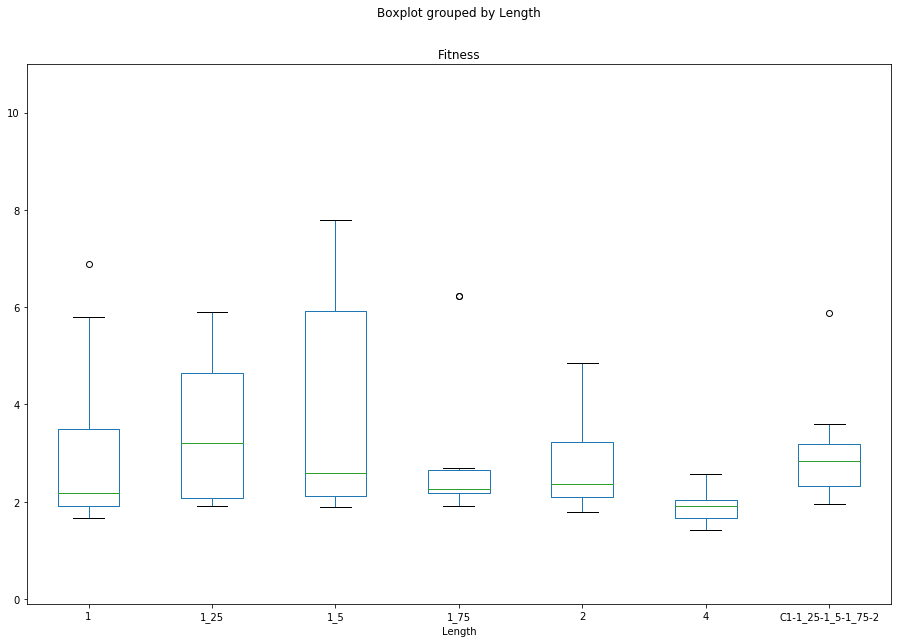

KruskalResult(statistic=13.747122736418532, pvalue=0.032592097178679315)


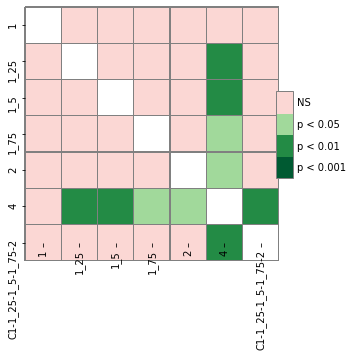

In [47]:
folders = ['1','1_25','1_5','1_75','2','4','C1-1_25-1_5-1_75-2']
boxplotResults('flatBase',folders,'evol',10,False)

# All Number of Modules Individual graphs

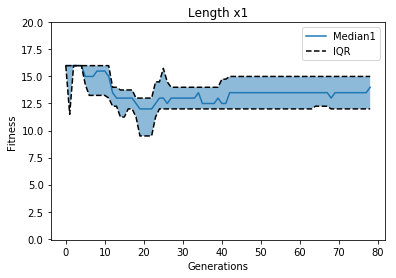

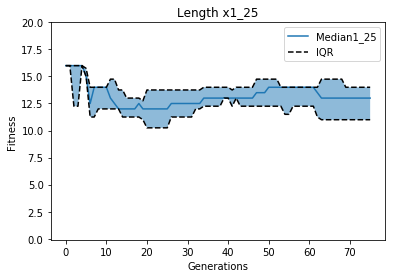

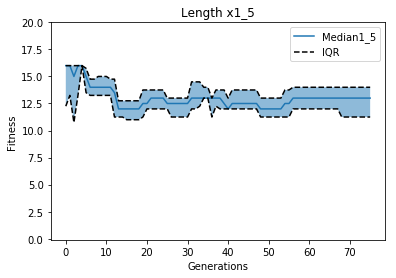

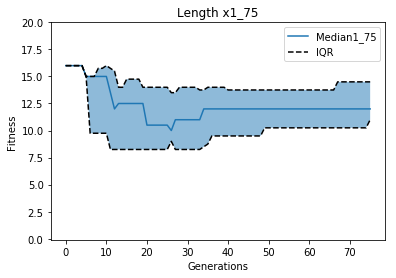

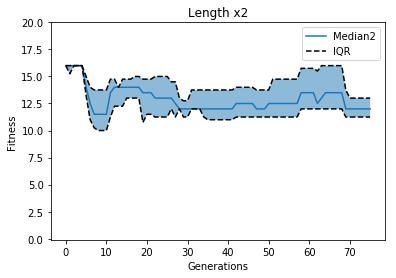

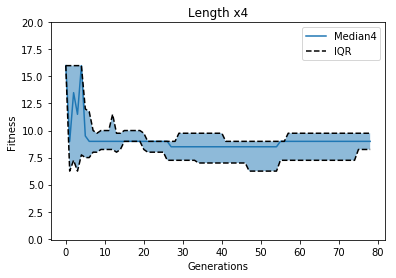

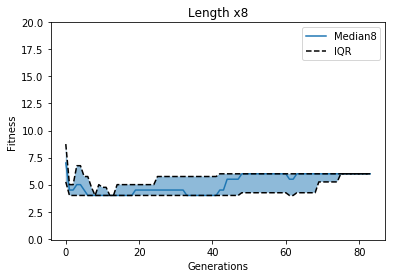

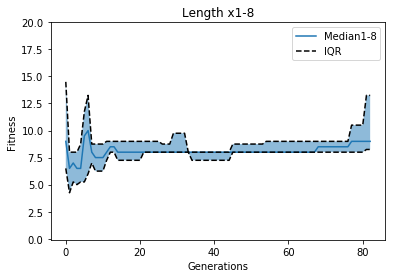

In [9]:
folders = ['1','1_25','1_5','1_75','2','4','8','1-8']     
plotResultGraphs('filesFromLenghtExperiment',folders,'nModules',10,True)

# Compare nModules (Put folders to compare in folders array)

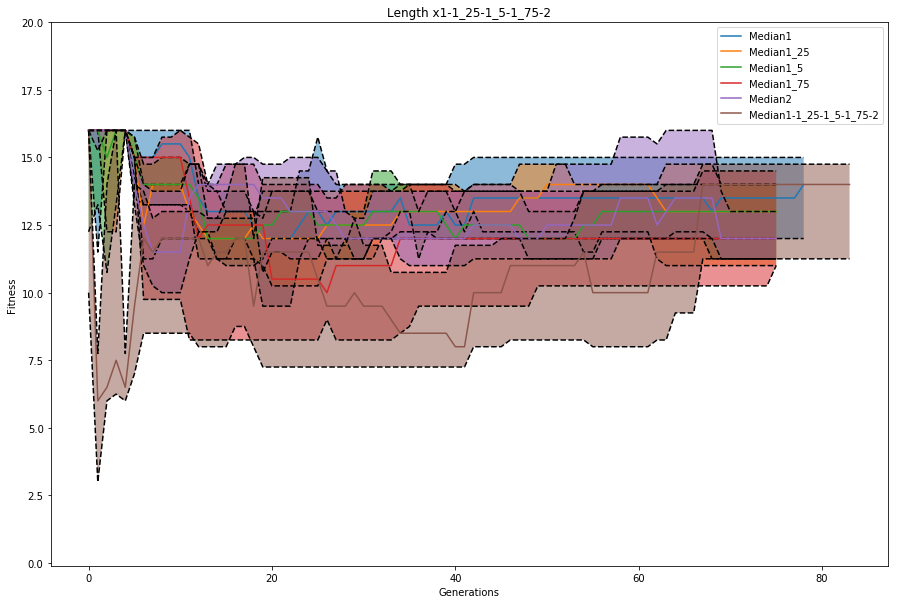

In [10]:
folders = ['1','1_25','1_5','1_75','2','1-1_25-1_5-1_75-2']   
plotResultGraphs('filesFromLenghtExperiment',folders,'nModules',10,False)

# All broken connections Individual graphs

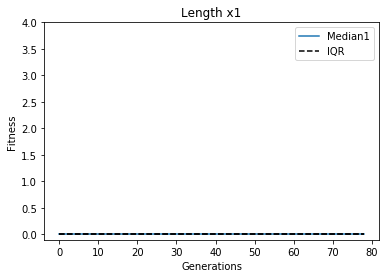

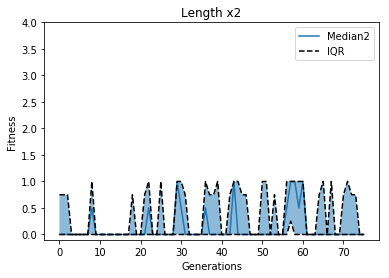

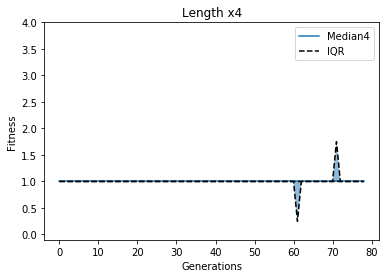

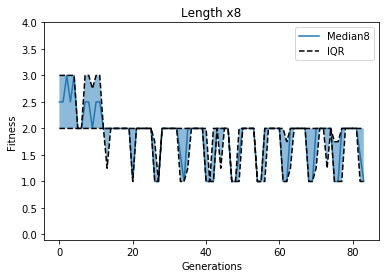

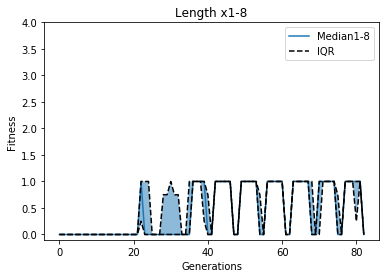

In [16]:
folders = ['1','2','4','8','1-8']     
plotResultGraphs('filesFromLenghtExperiment',folders,'brokenConn',10,True)

# Compare broken connections (Put folders to compare in folders array)

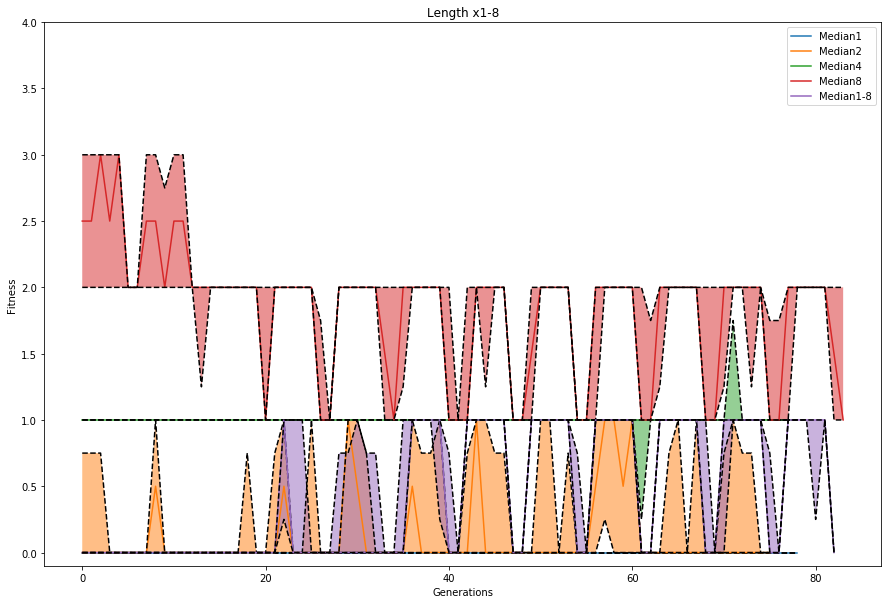

In [17]:
folders = ['1','2','4','8','1-8']   
plotResultGraphs('filesFromLenghtExperiment',folders,'brokenConn',10,False)

# 4ModuleInit Evolution Compare

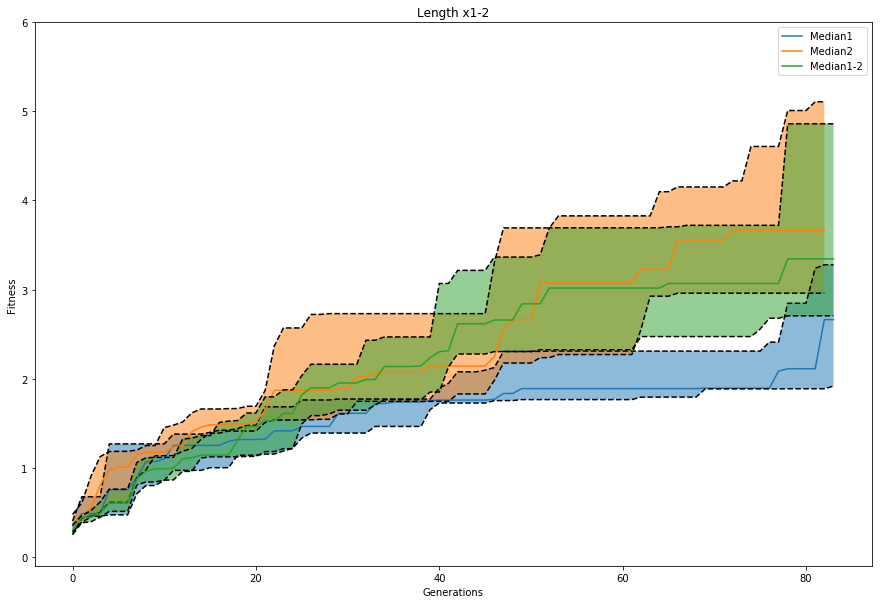

In [103]:
folders = ['1','2','1-2']  
plotResultGraphs('4ModuleInit',folders,'evol',10,False)

# FlatBase Evolution Individual Graphs

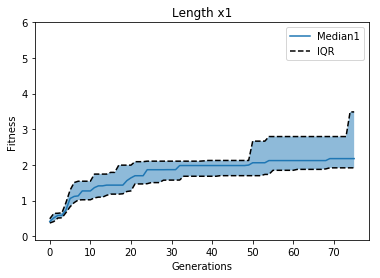

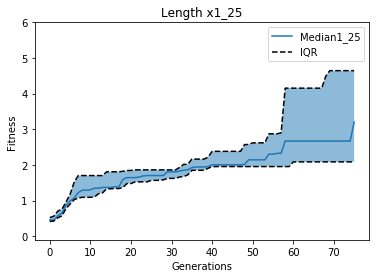

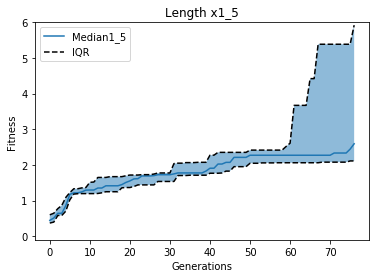

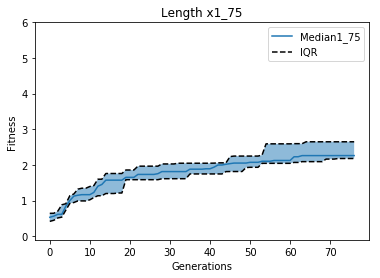

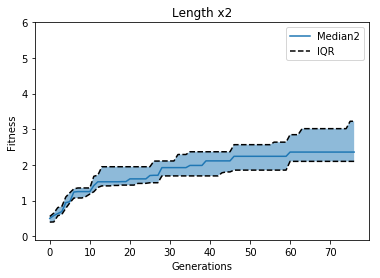

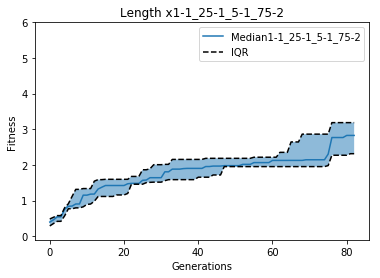

In [3]:
folders = ['1','1_25','1_5','1_75','2','1-1_25-1_5-1_75-2']     
plotResultGraphs('flatBase',folders,'evol',10,True)

# FlatBase Evolution Compare

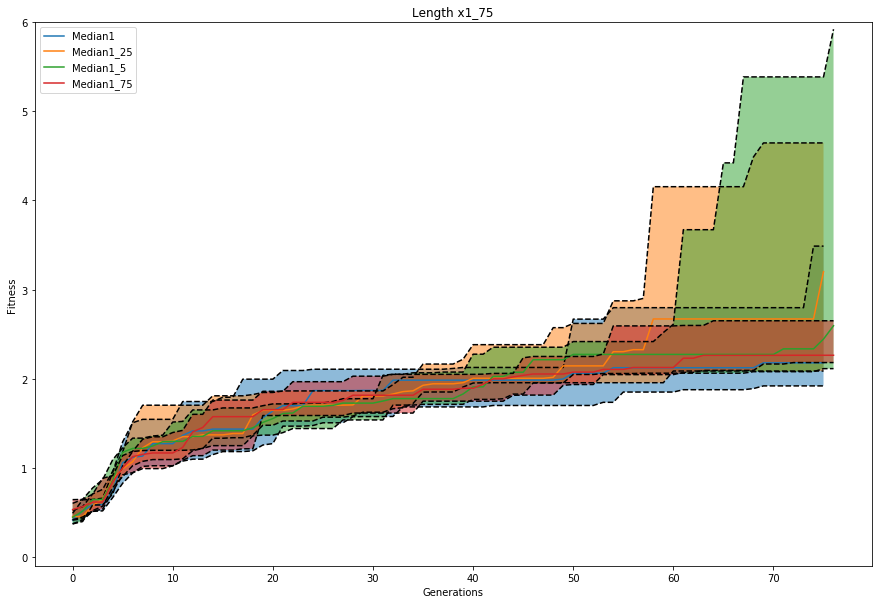

In [5]:
folders = ['1','1_25','1_5','1_75']     
plotResultGraphs('flatBase',folders,'evol',10,False)

# Compare Bases

KruskalResult(statistic=30.298358662613964, pvalue=0.004264888118021654)


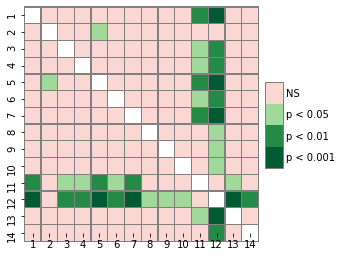

In [42]:
folders = ['1','1_25','1_5','1_75','2','4','C1-1_25-1_5-1_75-2']
compareBases(['flatBase','filesFromLenghtExperiment'],folders,'evol',10)